In [65]:
%tensorboard --logdir drive/My\ Drive/Data/logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 7440.

In [66]:
predictions = model.predict(val_data, verbose=1) 
predictions

7/7 [==============================] - 15s 2s/step


array([[4.96020599e-04, 2.19496986e-04, 1.78753235e-03, ...,
        1.14499089e-04, 3.11423246e-05, 9.65233613e-03],
       [5.94473723e-03, 1.02544657e-03, 1.10287415e-02, ...,
        5.43112983e-04, 4.11852775e-03, 4.72288557e-05],
       [7.77412861e-05, 2.18627567e-04, 4.79380142e-05, ...,
        2.60222325e-04, 6.43323147e-05, 2.68486998e-04],
       ...,
       [7.85857992e-06, 1.30201821e-04, 1.29186665e-05, ...,
        2.28248537e-05, 2.14373955e-04, 1.46203929e-05],
       [1.27687082e-02, 6.76456984e-05, 1.87106838e-04, ...,
        3.92202492e-05, 5.23203271e-05, 3.96029605e-03],
       [1.97770511e-04, 4.56269845e-05, 1.04530691e-03, ...,
        4.78245970e-03, 7.13990943e-04, 1.44602192e-04]], dtype=float32)

In [68]:
print(predictions[0])

[4.96020599e-04 2.19496986e-04 1.78753235e-03 5.07885597e-05
 1.12552611e-04 6.91645910e-05 1.89939290e-02 2.25237280e-04
 1.98865263e-03 1.50989625e-03 8.18518747e-04 4.55788773e-04
 1.39996395e-04 1.27649546e-04 5.21984883e-04 3.50929360e-04
 2.23852840e-05 2.27864414e-01 1.10977862e-05 4.07010048e-05
 3.24754568e-04 4.57477545e-05 2.56631665e-05 3.99620133e-03
 4.92627805e-05 1.97047731e-04 3.79763693e-02 1.06851687e-04
 9.09975846e-04 1.98093257e-04 5.67023017e-05 3.23309912e-03
 7.19831267e-04 1.93920368e-05 2.58712447e-04 3.57764922e-02
 1.61601547e-05 3.71408940e-04 6.38411802e-05 6.23078522e-05
 1.74699037e-03 6.40332200e-06 4.70341591e-04 5.92349155e-04
 2.61072837e-05 1.08819309e-04 7.96413224e-06 2.00142575e-04
 7.13742687e-04 1.25053094e-03 1.58538533e-04 3.26132904e-05
 9.17945465e-04 8.08553450e-05 2.44693016e-04 2.78628431e-05
 2.55265884e-04 1.09029468e-03 7.88240973e-03 2.75267601e-01
 8.26107207e-05 2.77801428e-05 3.43128777e-04 1.81667692e-05
 1.59831287e-03 1.241718

In [69]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[0])
pred_label

'irish_wolfhound'

In [70]:
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [71]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

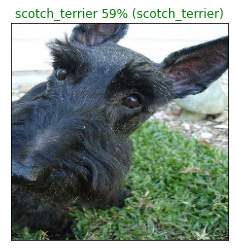

In [72]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [73]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

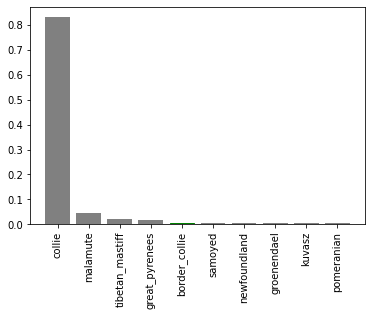

In [74]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

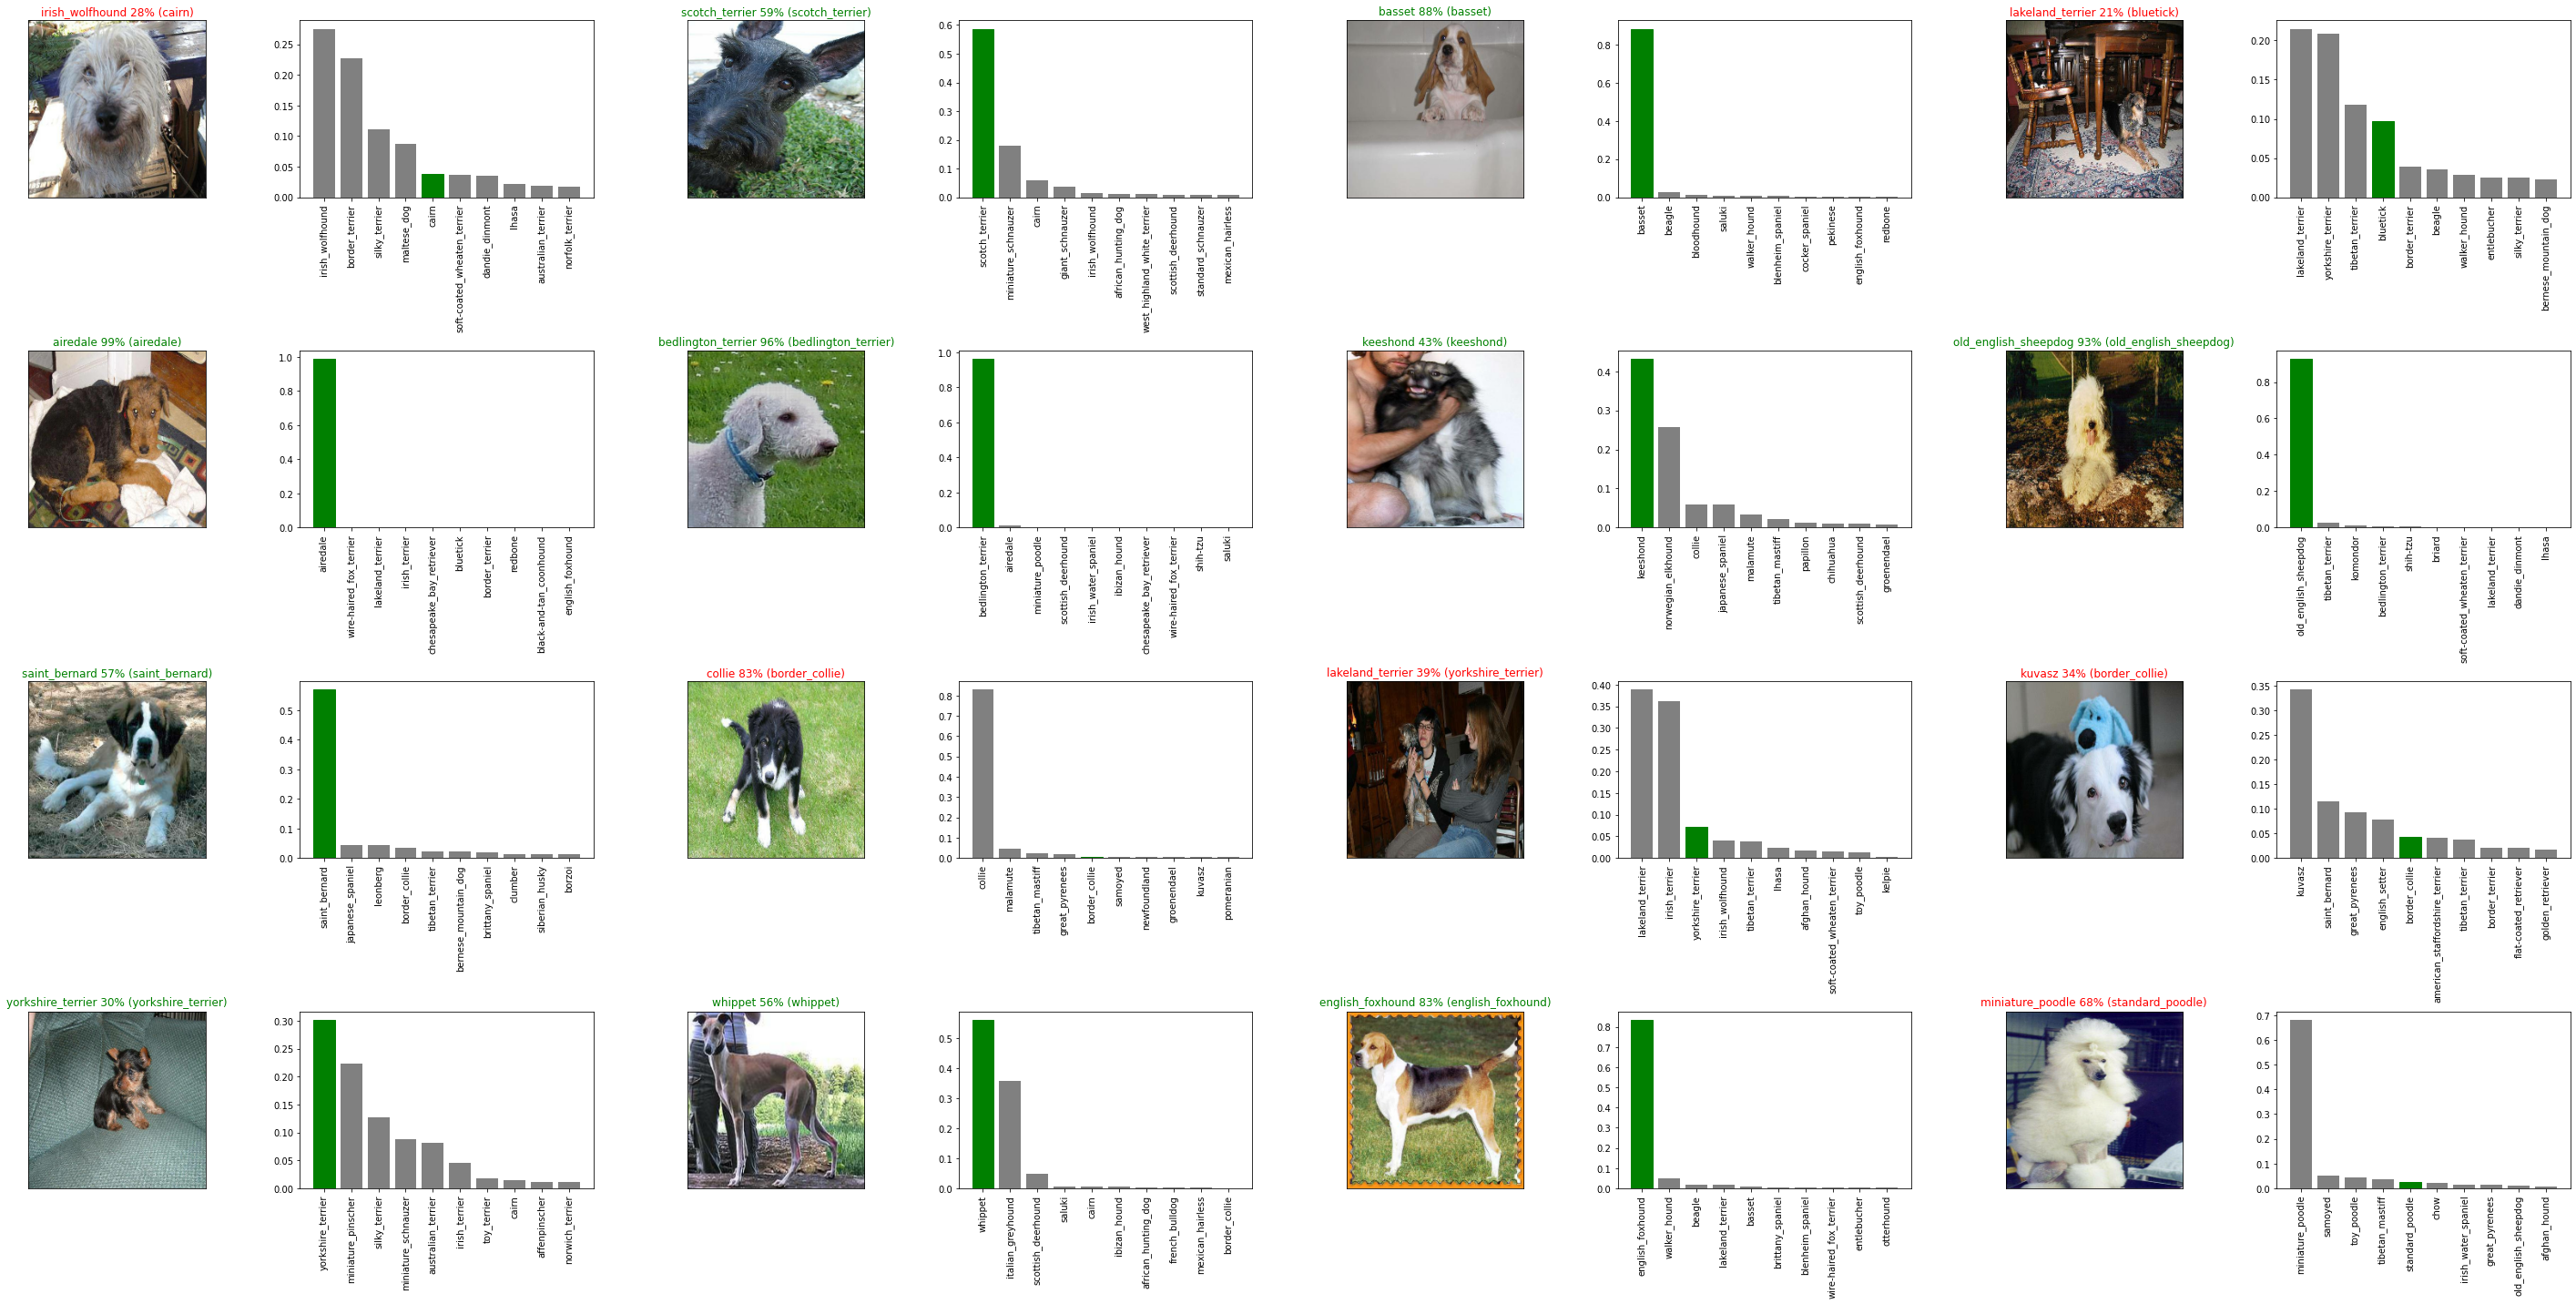

In [78]:
i_multiplier = 0
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [88]:
def save_model(model, suffix=None):
    modeldir = os.path.join("drive/My Drive/Data/models",
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%f"))
    model_path = modeldir + "-" + suffix + ".h5" 
    print(f"Saving model to: {model_path}...")
    model.save(model_path)

In [90]:
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models\20230411-1236985760-1000-images-Adam.h5...


In [92]:
model.evaluate(val_data)

7/7 [==============================] - 18s 2s/step - loss: 1.3115 - accuracy: 0.6650


[1.3114650249481201, 0.6650000214576721]

In [94]:
len(x), len(y)

(10222, 10222)

In [98]:
full_data = create_data_batches(x, y)

Creating training data batches...


In [100]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [101]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [102]:
%tensorboard --logdir drive/My\ Drive/Data/logs

Reusing TensorBoard on port 6006 (pid 1292), started 0:20:51 ago. (Use '!kill 1292' to kill it.)